In [26]:
import numpy  as np
import tables as tb

from invisible_cities.io   .pmaps_io      import load_pmaps
from invisible_cities.icaro.hst_functions import labels

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 8
plt.rcParams[  "font.size"   ] = 15

In [28]:
def display_pmap(pmap):
    for i, s1 in enumerate(pmap.s1s):
        plt.plot(s1.times, s1.pmts.sum_over_sensors, "*-", label="S1 {}".format(i))
    for i, s2 in enumerate(pmap.s2s):
        plt.plot(s2.times, s2.pmts.sum_over_sensors, "*-", label="S2 {}".format(i))
    plt.legend()
    plt.yscale("log")
    
def compare_pmaps(pmap_a, pmap_b):
    plt.figure()
    for i, s1 in enumerate(pmap_a.s1s):
        plt.plot(s1.times, s1.pmts.sum_over_sensors, "p", label="S1 A {}".format(i))
    for i, s1 in enumerate(pmap_b.s1s):
        plt.plot(s1.times, s1.pmts.sum_over_sensors, "-", label="S1 B {}".format(i))

    for i, s2 in enumerate(pmap_a.s2s):
        plt.plot(s2.times, s2.pmts.sum_over_sensors, "p", label="S2 A {}".format(i))
    for i, s2 in enumerate(pmap_b.s2s):
        plt.plot(s2.times, s2.pmts.sum_over_sensors, "-", label="S2 B {}".format(i))
    plt.legend()
    plt.yscale("log")

    plt.figure()
    for i, s1 in enumerate(pmap_a.s1s):
        plt.subplot(2, 2, i+1)
        plt.plot(s1.times, s1.pmts.sum_over_sensors, "p", label="S1 master {}".format(i))
        plt.legend()
    for i, s1 in enumerate(pmap_b.s1s):
        plt.subplot(2, 2, i+1)
        plt.plot(s1.times, s1.pmts.sum_over_sensors, "-", label="S1 new {}".format(i))
        plt.legend()
    for i, s2 in enumerate(pmap_a.s2s):
        plt.subplot(2, 2, i+3)
        plt.plot(s2.times, s2.pmts.sum_over_sensors, "p", label="S2 master {}".format(i))
        plt.legend()
    for i, s2 in enumerate(pmap_b.s2s):
        plt.subplot(2, 2, i+3)
        plt.plot(s2.times, s2.pmts.sum_over_sensors, "-", label="S2 new {}".format(i))
        plt.legend()
    

# Kr data

In [29]:
filename_master = "/Users/Gonzalo/github/NEXTdata/validate_pmaps/Kr_pmaps_master.h5"
filename_new    = "/Users/Gonzalo/github/NEXTdata/validate_pmaps/Kr_pmaps_new.h5"

In [30]:
pmaps_master = load_pmaps(filename_master)
pmaps_new    = load_pmaps(filename_new   )

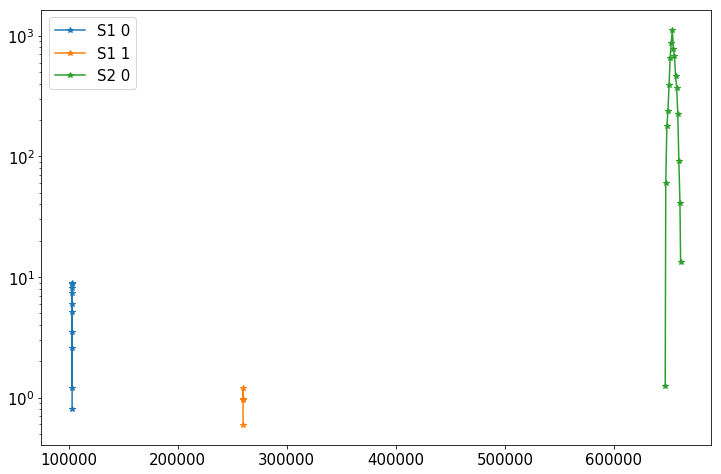

In [31]:
display_pmap(pmaps_master[3])

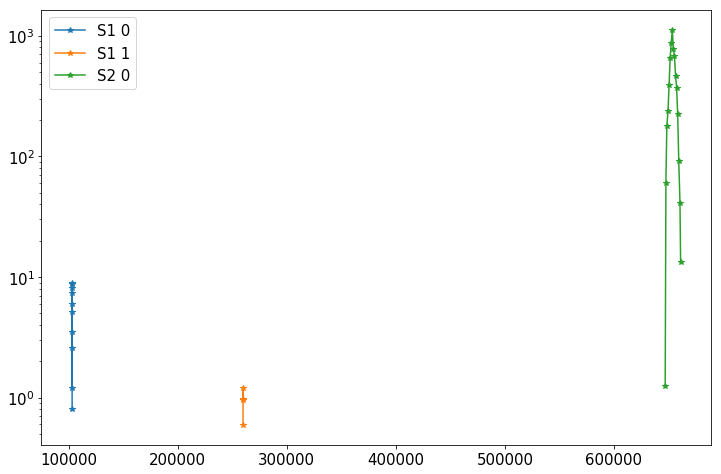

In [32]:
display_pmap(pmaps_new[3])

Event number:  36


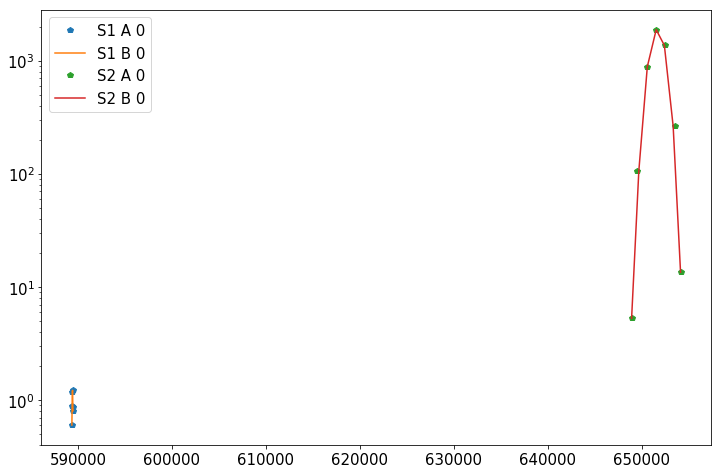

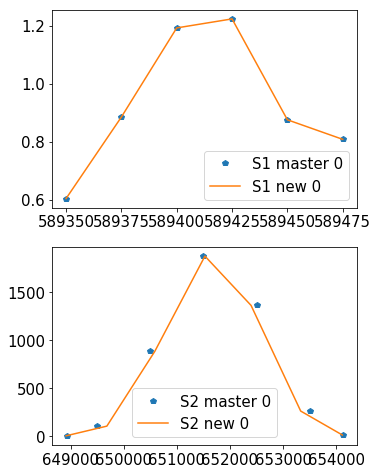

In [33]:
n = 36
print("Event number: ", n)
compare_pmaps(pmaps_master[n], pmaps_new[n])

#### Detail on the different definitions of time

In [34]:
for i in zip(pmaps_master[36].s2s[0].times,
             pmaps_new   [36].s2s[0].times):
    print(i)

(648925.0, 648909.81)
(649500.0, 649679.31)
(650500.0, 650582.31)
(651500.0, 651527.62)
(652500.0, 652396.94)
(653500.0, 653332.56)
(654125.0, 654118.56)


Event number:  164
Event number:  42
Event number:  129
Event number:  30
Event number:  110
Event number:  150
Event number:  134


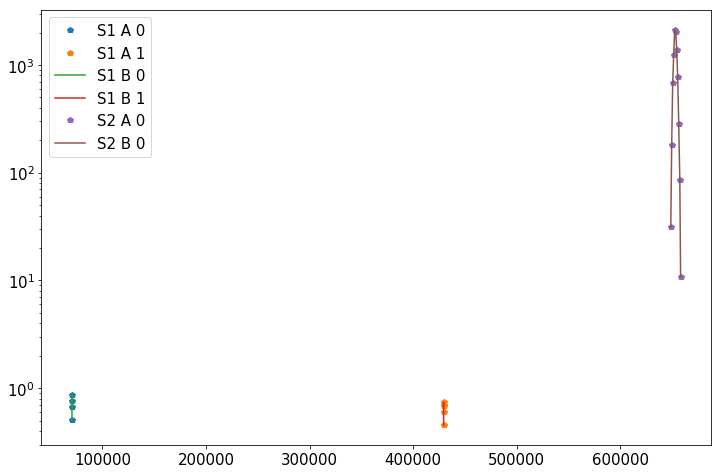

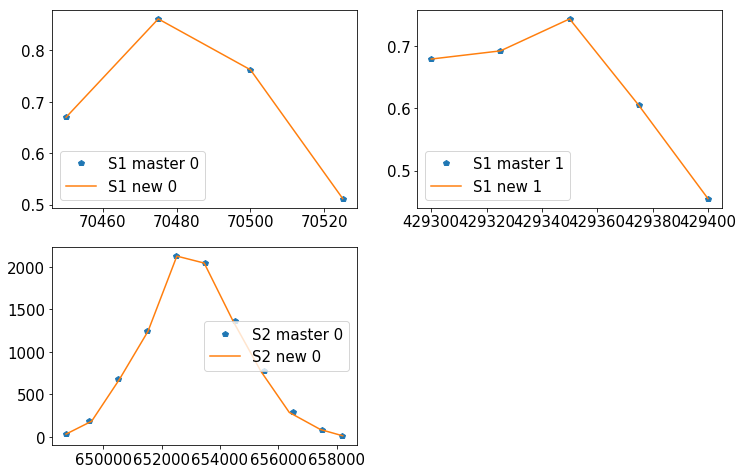

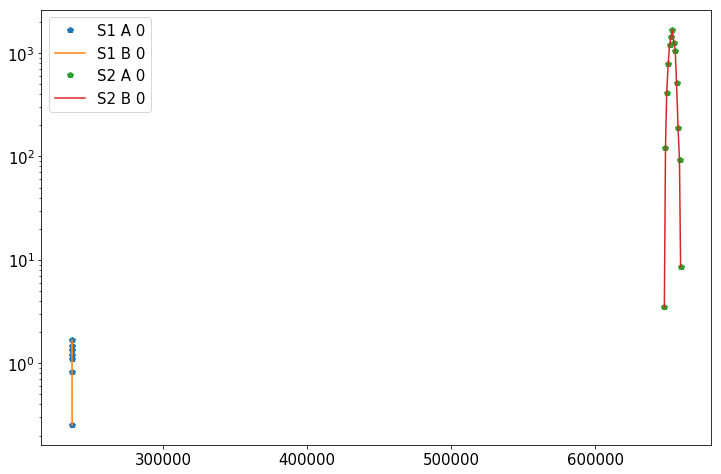

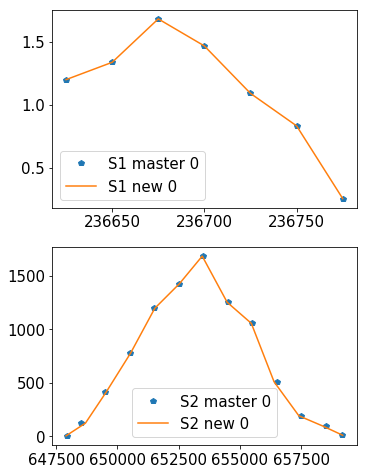

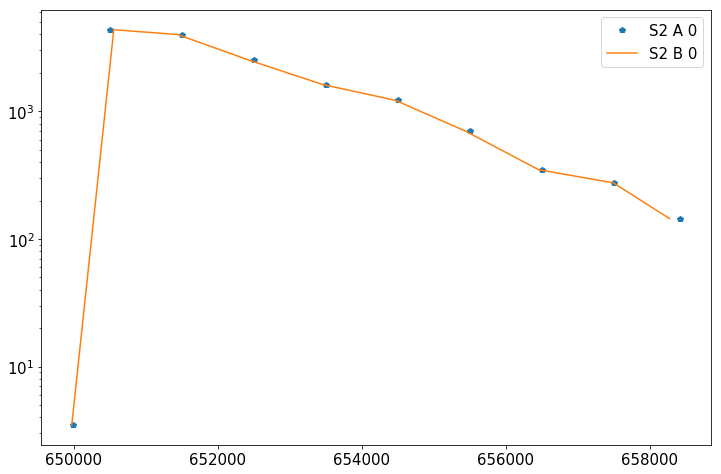

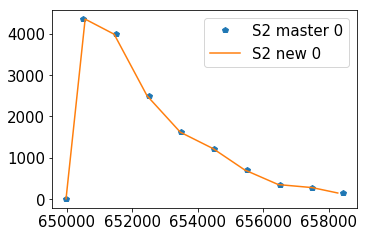

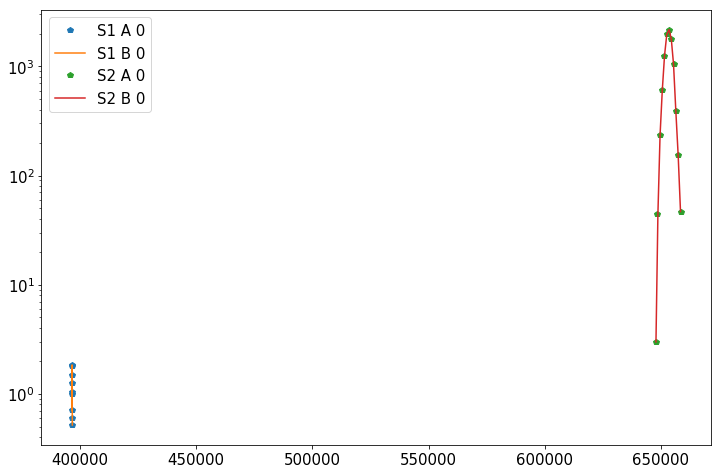

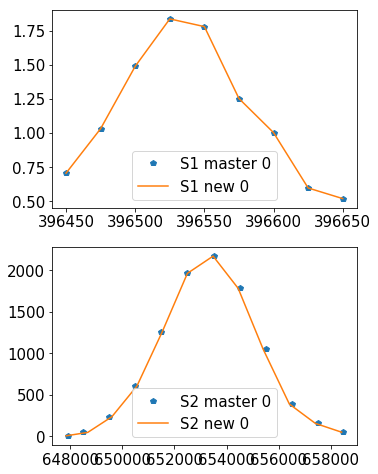

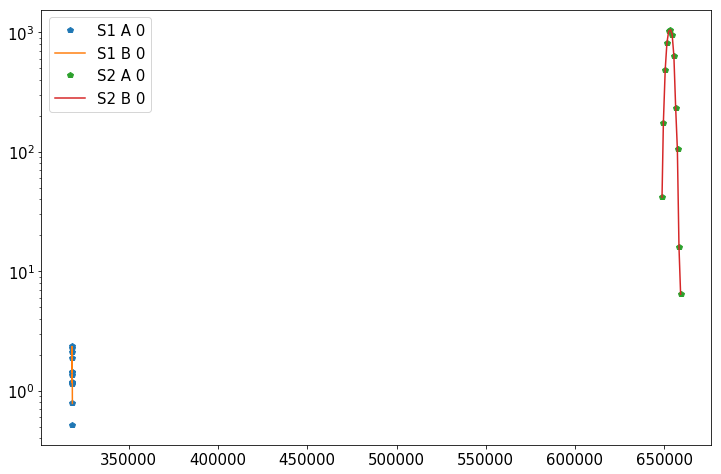

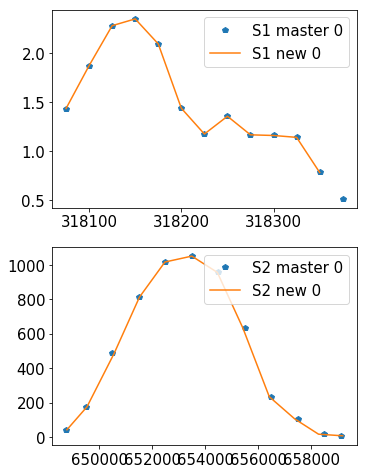

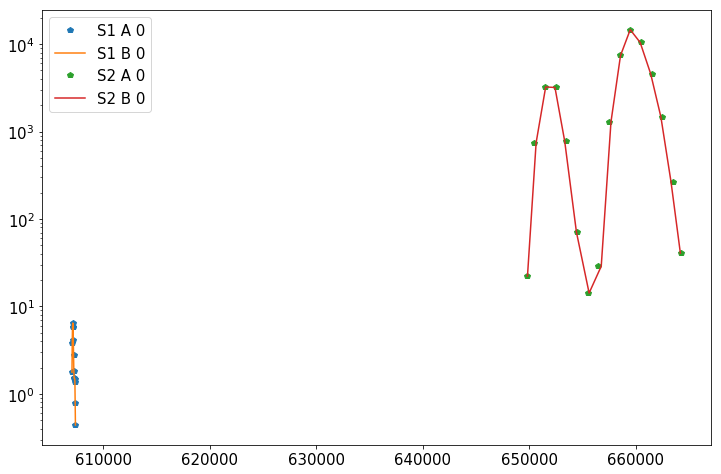

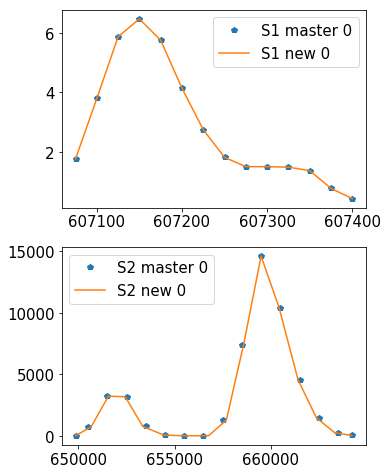

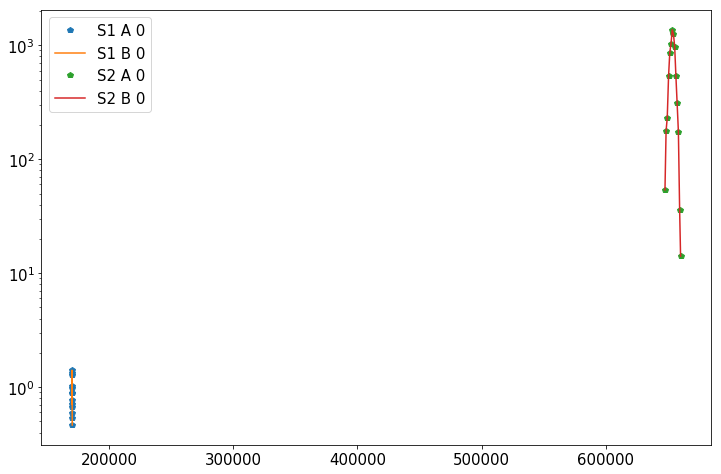

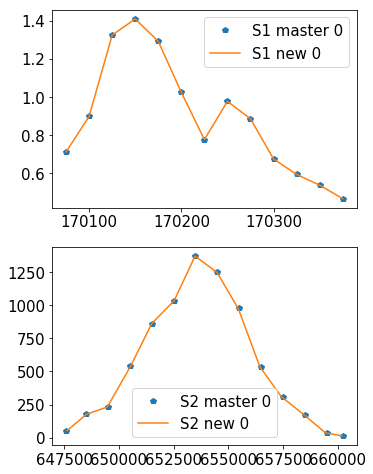

In [35]:
ns = np.random.choice(list(pmaps_new), size=10, replace=False)
for n in ns:
    if max(len(pmaps_master[n].s1s), len(pmaps_master[n].s2s),
           len(pmaps_new   [n].s1s), len(pmaps_new   [n].s2s)) > 2: continue
    print("Event number: ", n)
    compare_pmaps(pmaps_master[n], pmaps_new[n])

In [11]:
nS1s, nS2s, E_m, E_n = [[] for i in range(4)]

for i in pmaps_master:
    pmap_m = pmaps_master[i]
    pmap_n = pmaps_new   [i]

    nS1_m = len(pmap_m.s1s)
    nS1_n = len(pmap_n.s1s)
    nS2_m = len(pmap_m.s2s)
    nS2_n = len(pmap_n.s2s)
    nS1s.append((nS1_m, nS1_n))
    nS2s.append((nS2_m, nS2_n))

    if nS2_m == nS2_n:
        for i in range(nS2_m):
            E_m.append(pmap_m.s2s[i].pmts.sum_over_sensors.sum())
            E_n.append(pmap_n.s2s[i].pmts.sum_over_sensors.sum())


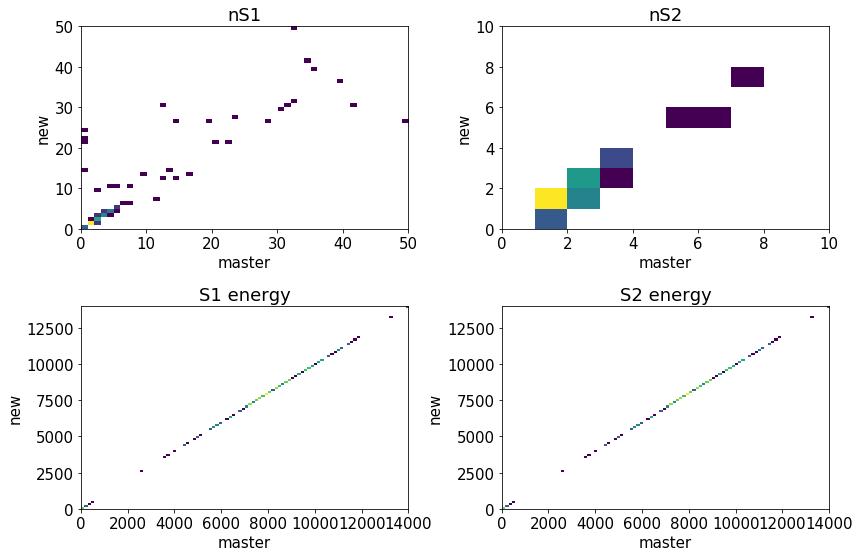

In [36]:
plt.figure()

nS1_m, nS1_n = zip(*nS1s)
nS2_m, nS2_n = zip(*nS2s)

nS1_max = 50#max(max(nS1_m), max(nS1_n)) + 1
nS2_max = 10#max(max(nS2_m), max(nS2_n)) + 1

E_max = 14e3#max(max(E_m), max(E_n))

plt.subplot(2, 2, 1)
plt.hist2d(nS1_m, nS1_n, nS1_max, ((0, nS1_max),(0, nS1_max)), norm=LogNorm())
labels("master", "new", "nS1")

plt.subplot(2, 2, 2)
plt.hist2d(nS2_m, nS2_n, nS2_max, ((0, nS2_max),(0, nS2_max)), norm=LogNorm())
labels("master", "new", "nS2")

plt.subplot(2, 2, 3)
plt.hist2d(E_m, E_n, 100, ((0, E_max), (0, E_max)), norm=LogNorm())
labels("master", "new", "S1 energy")

plt.subplot(2, 2, 4)
plt.hist2d(E_m, E_n, 100, ((0, E_max), (0, E_max)), norm=LogNorm());
labels("master", "new", "S2 energy")

plt.tight_layout()

# Th data

In [15]:
filename_master = "/Users/Gonzalo/github/NEXTdata/validate_pmaps/Th_pmaps_master.h5"
filename_new    = "/Users/Gonzalo/github/NEXTdata/validate_pmaps/Th_pmaps_new.h5"

In [16]:
pmaps_master = load_pmaps(filename_master)
pmaps_new    = load_pmaps(filename_new   )

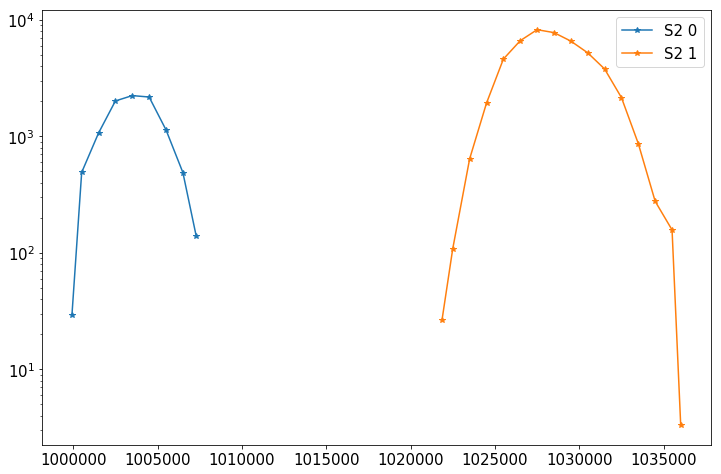

In [17]:
display_pmap(pmaps_master[3])

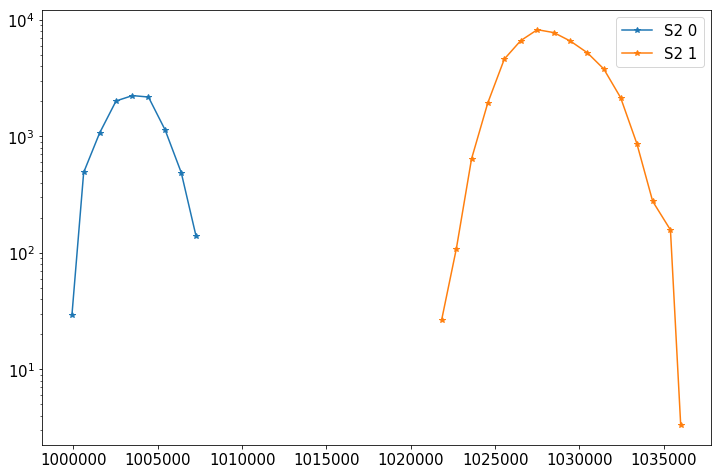

In [18]:
display_pmap(pmaps_new[3])

Event number:  10


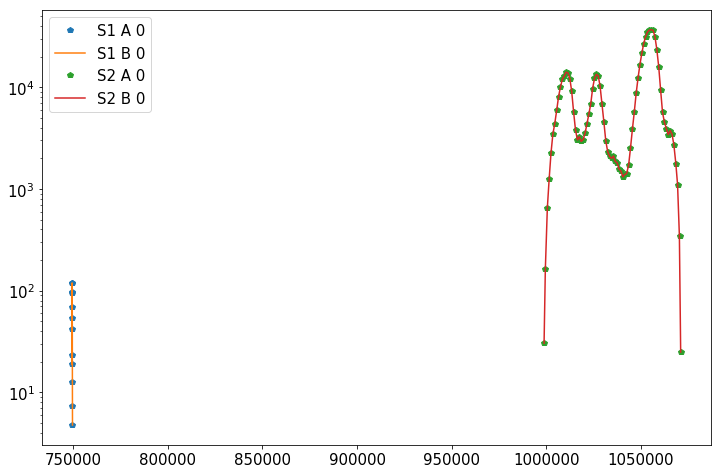

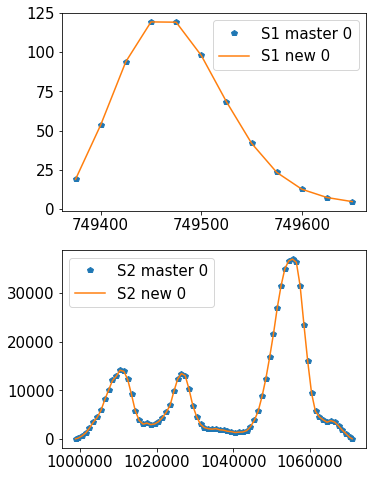

In [24]:
n = 10
print("Event number: ", n)
compare_pmaps(pmaps_master[n], pmaps_new[n])

Event number:  5
Event number:  75
Event number:  77
Event number:  93
Event number:  18
Event number:  48
Event number:  74
Event number:  69
Event number:  67
Event number:  81


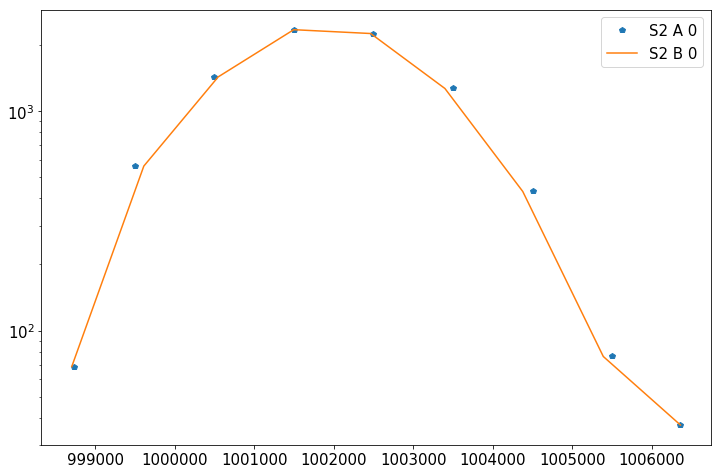

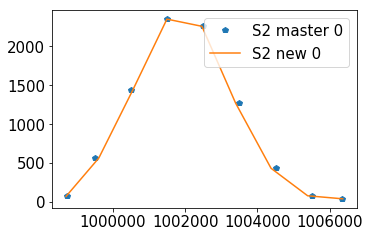

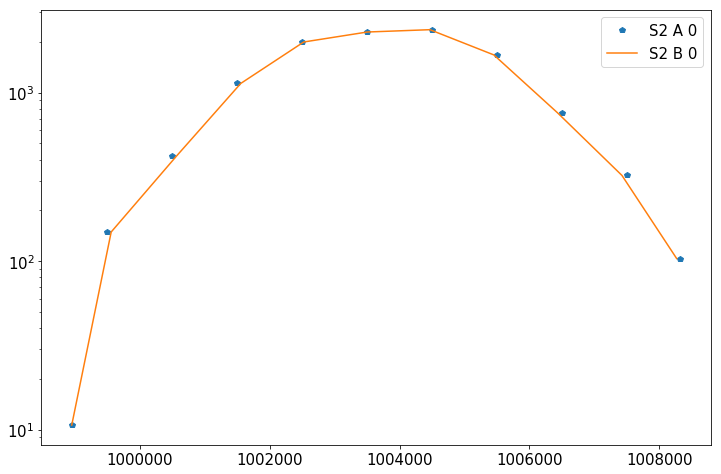

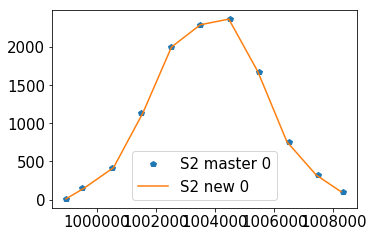

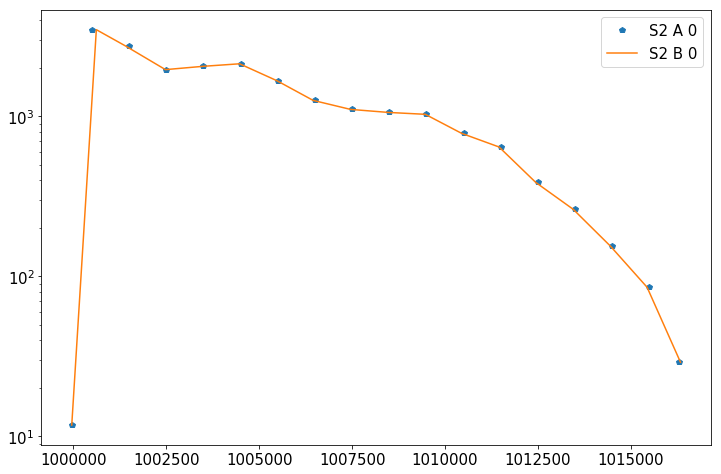

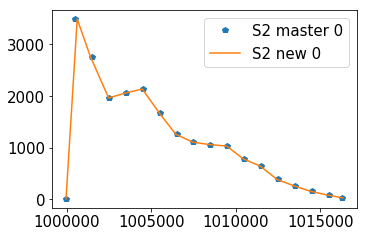

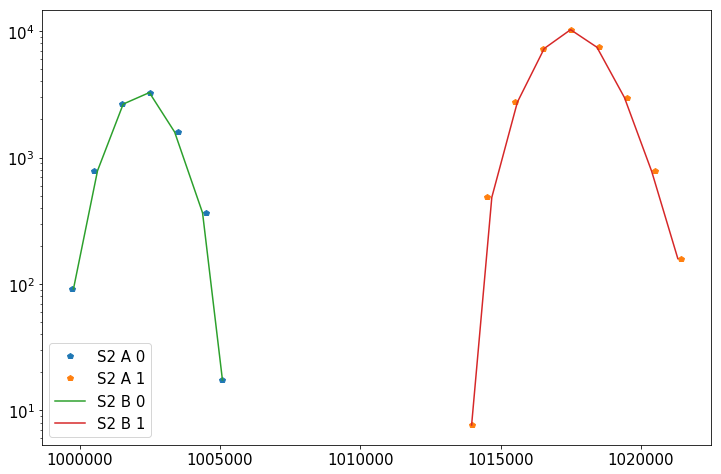

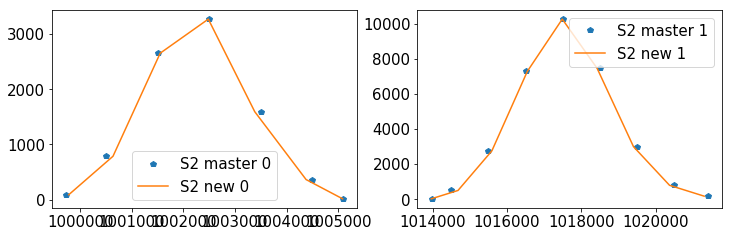

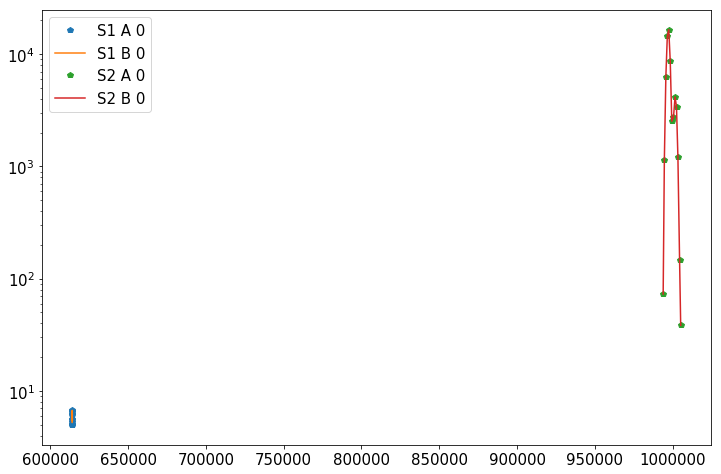

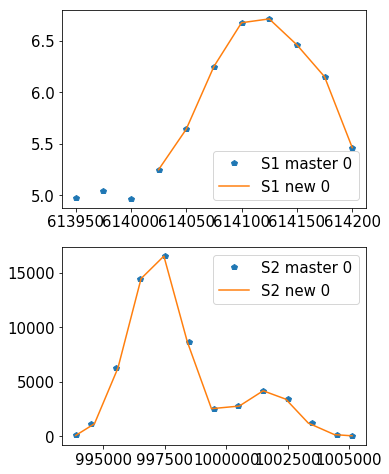

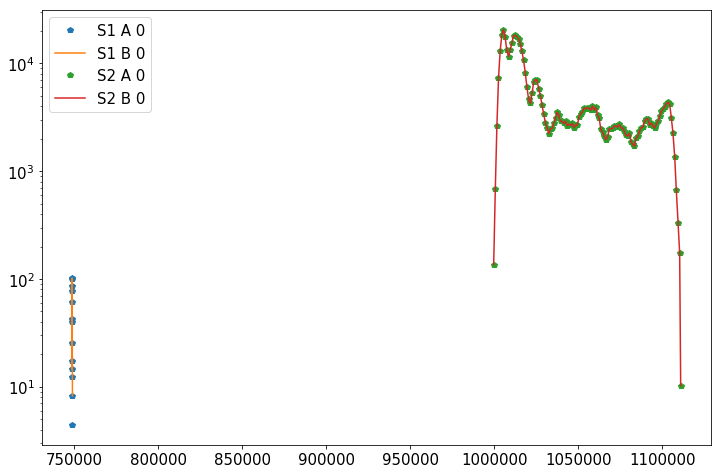

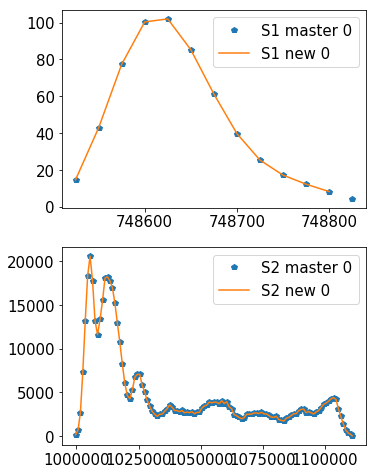

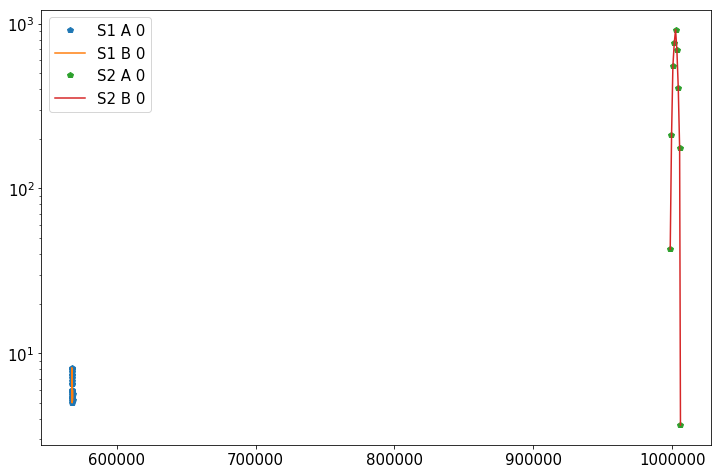

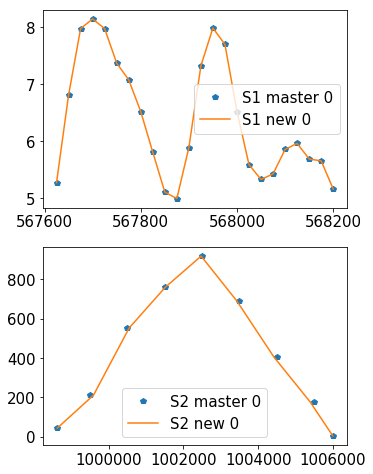

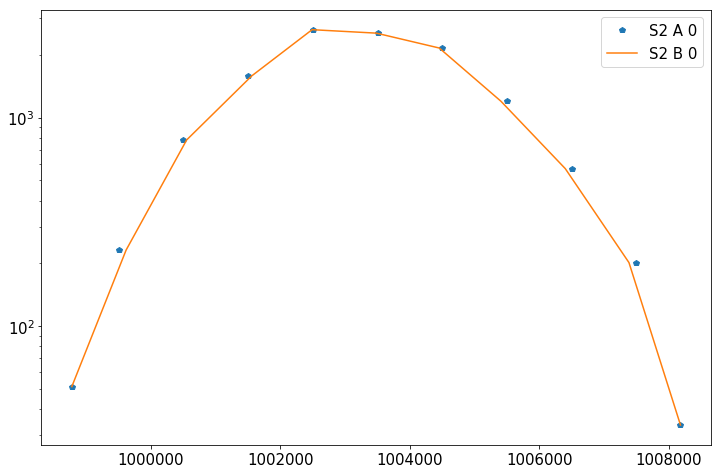

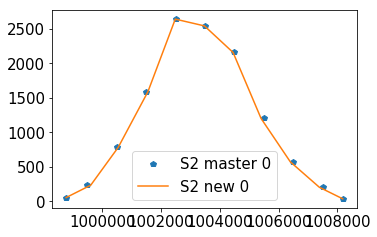

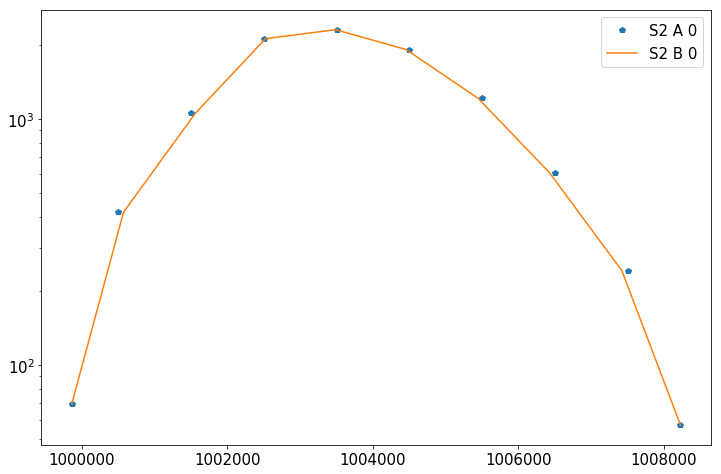

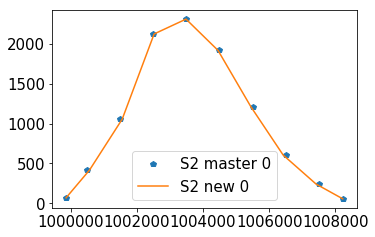

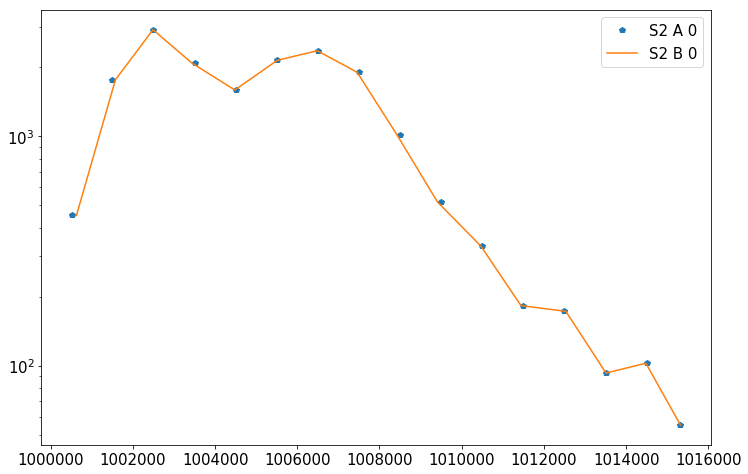

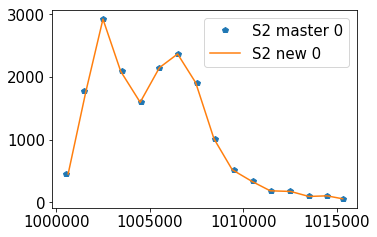

In [25]:
ns = np.random.choice(list(pmaps_new), size=10, replace=False)
for n in ns:
    if max(len(pmaps_master[n].s1s), len(pmaps_master[n].s2s),
           len(pmaps_new   [n].s1s), len(pmaps_new   [n].s2s)) > 2: continue
    print("Event number: ", n)
    compare_pmaps(pmaps_master[n], pmaps_new[n])

In [11]:
nS1s, nS2s, E_m, E_n = [[] for i in range(4)]

for i in pmaps_master:
    pmap_m = pmaps_master[i]
    pmap_n = pmaps_new   [i]

    nS1_m = len(pmap_m.s1s)
    nS1_n = len(pmap_n.s1s)
    nS2_m = len(pmap_m.s2s)
    nS2_n = len(pmap_n.s2s)
    nS1s.append((nS1_m, nS1_n))
    nS2s.append((nS2_m, nS2_n))

    if nS2_m == nS2_n:
        for i in range(nS2_m):
            E_m.append(pmap_m.s2s[i].pmts.sum_over_sensors.sum())
            E_n.append(pmap_n.s2s[i].pmts.sum_over_sensors.sum())


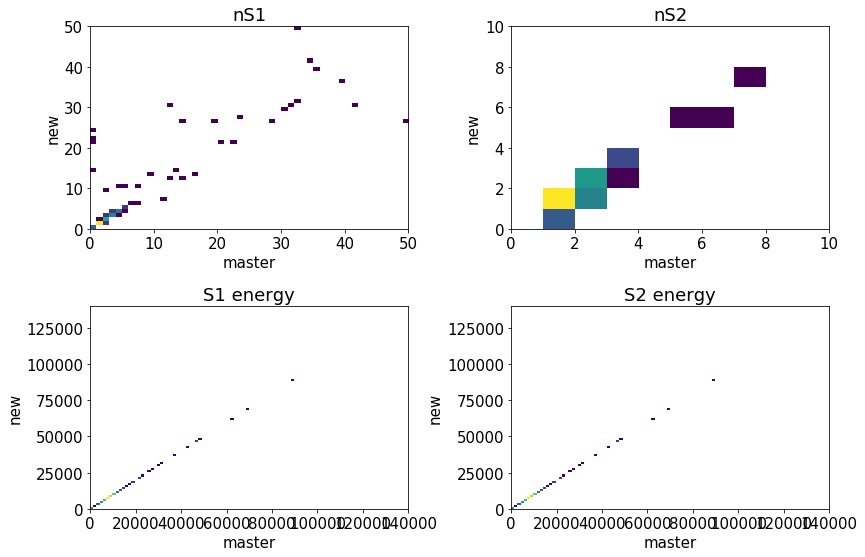

In [38]:
plt.figure()

nS1_m, nS1_n = zip(*nS1s)
nS2_m, nS2_n = zip(*nS2s)

nS1_max = 50#max(max(nS1_m), max(nS1_n)) + 1
nS2_max = 10#max(max(nS2_m), max(nS2_n)) + 1

E_max = 14e4#max(max(E_m), max(E_n))

plt.subplot(2, 2, 1)
plt.hist2d(nS1_m, nS1_n, nS1_max, ((0, nS1_max),(0, nS1_max)), norm=LogNorm())
labels("master", "new", "nS1")

plt.subplot(2, 2, 2)
plt.hist2d(nS2_m, nS2_n, nS2_max, ((0, nS2_max),(0, nS2_max)), norm=LogNorm())
labels("master", "new", "nS2")

plt.subplot(2, 2, 3)
plt.hist2d(E_m, E_n, 100, ((0, E_max), (0, E_max)), norm=LogNorm())
labels("master", "new", "S1 energy")

plt.subplot(2, 2, 4)
plt.hist2d(E_m, E_n, 100, ((0, E_max), (0, E_max)), norm=LogNorm());
labels("master", "new", "S2 energy")

plt.tight_layout()